#### Introduction to Linear Regression

LR is a widely used model that is efficient, easy to train and interpretatble. We will use <span style="font-family:Comic Sans MS">sk-learn</span> and a couple of modules from <span style="font-family:Comic Sans MS">statsmodels</span> to demo the working of an LR model.

https://www.kaggle.com/ffisegydd/sklearn-multicollinearity-class

In [2]:
# Essetial imports

# This line enables inline plots within jupyter notebook
%matplotlib inline 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

In [129]:
# load data
df = pd.read_csv('data/data.csv', delimiter='\t', header=None)
df.columns = ['HoursStudied', 'Score'] # 'Score' is our target variable.
df.head()

,HoursStudied,Score
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


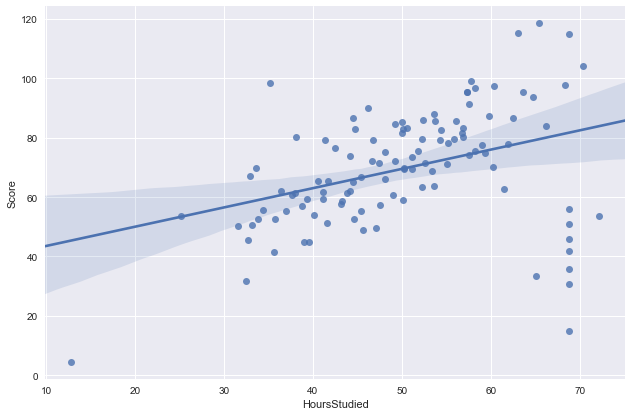

In [130]:
# Let's take a look at the scatter plot
sns.pairplot(data=df, x_vars=['HoursStudied'], y_vars='Score', kind='reg', size=6, aspect=1.5) # in latest sns use 'height' 
                                                                                   # in place of  'size'

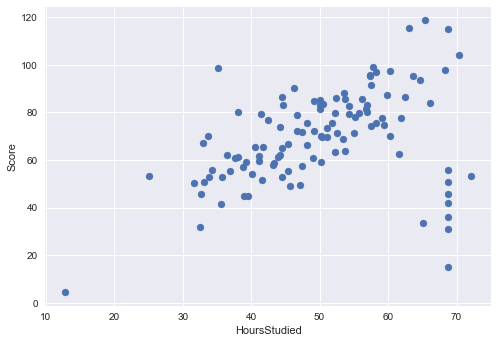

In [131]:
plt.scatter(df['HoursStudied'], df['Score'])
plt.ylabel('Score')
plt.xlabel('HoursStudied')

In [132]:
# import for splitting data into train and test sets
from sklearn.model_selection import train_test_split

In [133]:
X = df[['HoursStudied']]
y = df['Score']

In [134]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int, None, optional
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. By default, the value is set 

In [135]:
# Using train_test_split get our sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

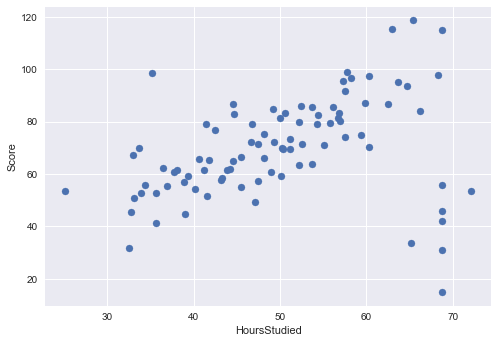

In [136]:
plt.scatter(X_train['HoursStudied'], y_train)
plt.ylabel('Score')
plt.xlabel('HoursStudied')
plt.show()

In [137]:
# Based on the plot above, we notice that there are some outliers and leverage points
# Outliers: An outlier is a point i for which y_i is far from the value predicted by the model.
# Leverage: Point i with high leverage has an unusual value for x_i
# Here you'll find a pictorial explanation of this concept https://newonlinecourses.science.psu.edu/stat501/node/337/

#In the next couple of steps we'll fit a regression model and study the residual plot to understand outliers better

In [138]:
# import LR model class
from sklearn.linear_model import LinearRegression

In [139]:
# instantiate the model
lr = LinearRegression()

In [140]:
# fit the model using training set
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [141]:
# Let's take a look at the parameters that we learned
print('Intercept: ', lr.intercept_)
print('Slope: ', lr.coef_)

Intercept:  41.218896606468185
Slope:  [0.5752331]


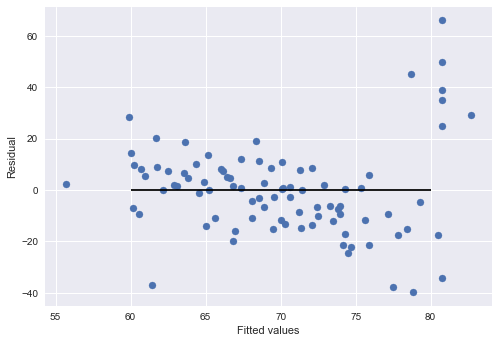

In [142]:
# residual vs predicted values: on training set
pred_vals = lr.predict(X_train)
residuals = pred_vals - y_train
plt.scatter(pred_vals, residuals)
plt.hlines(y=0, xmin=60, xmax=80)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.show()

In [143]:
# Residual Sum of Squares
(residuals**2).sum()

28484.178841024674

In [165]:
class Model(object):
    """
     Linear Regression(Linear Least Squares Regression).
    """

    def __init__(self):
        self.beta = None
        self.std_scaler = None

    def fit(self, X, y):
        """
        Fits the regression model to the training data.

        Arguments
        ----------
        X: nxp matrix of n examples with p independent variables
        y: response variable vector for n examples
        """
        X = np.hstack([np.ones(X.shape[0]).reshape(X.shape[0],1), X])
        self.beta = np.dot(np.linalg.inv(np.dot(X.T, X)),
                             np.dot(X.T, y))

    def predict(self, X):
        """
        Predicts the dependent variable of new data using the model.
        Arguments
        ----------
        X: nxp matrix of n examples with p covariates
        Returns
        ----------
        response variable vector for n examples
        """
        X = np.hstack([np.ones(X.shape[0]).reshape(X.shape[0],1), X])
        return np.dot(X, self.beta)

In [166]:
# Using our own hand-crafted model
model = Model()
model.fit(X_train, y_train)
model.beta

array([41.21889661,  0.5752331 ])

In [76]:
# Let's remove the points with high reisdual values
mask = ~(abs(residuals) > 20)
print(mask[:10], residuals[:10])

101    False
64      True
111    False
3       True
47      True
88      True
82      True
109    False
69      True
34      True
Name: Score, dtype: bool 101   -33.841969
64     -5.820508
111    45.847366
3      -2.496792
47    -16.752550
88     -5.810729
82      8.603094
109    20.847366
69     12.088213
34     -1.430060
Name: Score, dtype: float64


In [77]:
lr.fit(X_train[mask],y_train[mask])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

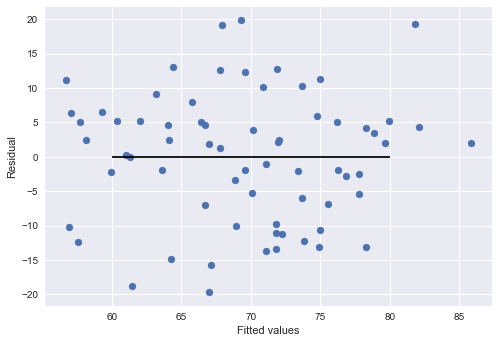

In [78]:
# residual vs predicted values: on training set
pred_vals = lr.predict(X_train[mask])
residuals = pred_vals - y_train[mask]
plt.scatter(pred_vals, residuals)
plt.hlines(y=0, xmin=60, xmax=80)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.show()

In [79]:
(residuals**2).sum()

5918.79043961122

In [91]:
# Let's introduce perfect collinearity into the data
X_train.loc[:, 'duplicate_HS'] = X_train['HoursStudied']
X_train.head()

/Users/shubhranshu.shekhar/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,HoursStudied,duplicate_HS
101,35.128485,35.128485
64,33.644706,33.644706
111,68.765734,68.765734
3,47.475640,47.475640
47,53.575078,53.575078


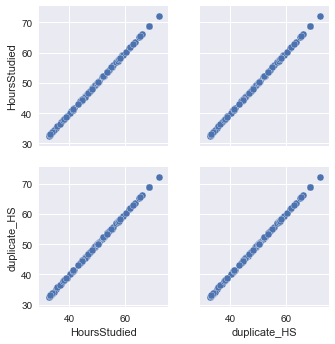

In [94]:
# To find out collinearity between two variables we could take a look at paiwise scatter plot
g = sns.pairplot(data=X_train, diag_kind=None)

In [96]:
# However scatter plots will not be able to detect multi-collinearity. However, we can systematically address this 
# using HIF values. Source: https://www.kaggle.com/ffisegydd/sklearn-multicollinearity-class

In [103]:
# import for VIF score claculation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import Imputer # for imputing missing values

# imports for creating custom sklearn transformers
from sklearn.base import BaseEstimator, TransformerMixin

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [104]:
# I'll demomstrate this using Boston housing dataset
# Let's start with data loading
from sklearn.datasets import load_boston

dataset = load_boston()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target

In [110]:
# Fit LR before removing any columns
lr_c = LinearRegression()
lr_c.fit(X, y)
print('Intercept: ', lr_c.intercept_)
print('Weights: ') 
print([(k, v) for k, v in zip(X.columns, lr_c.coef_)])

Intercept:  36.49110328036199
Weights: 
[('CRIM', -0.10717055656035383), ('ZN', 0.046395219529801815), ('INDUS', 0.020860239532171893), ('CHAS', 2.6885613993179547), ('NOX', -17.79575866030902), ('RM', 3.804752460258001), ('AGE', 0.0007510617033206213), ('DIS', -1.4757587965198176), ('RAD', 0.30565503833909746), ('TAX', -0.012329346305271827), ('PTRATIO', -0.9534635546905583), ('B', 0.009392512722189217), ('LSTAT', -0.5254666329007893)]


In [111]:
remove_collinearity = ReduceVIF()
X_new = remove_collinearity.fit_transform(X, y)
X.head()

ReduceVIF fit
ReduceVIF transform
Dropping PTRATIO with vif=85.02731352042679
Dropping NOX with vif=73.90144446644008
Dropping TAX with vif=57.720177047564796
Dropping RM with vif=39.055353678044725
Dropping AGE with vif=14.000157151747949
Dropping B with vif=10.057375463850262
Dropping INDUS with vif=6.8965944324236315


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [112]:
# Fit again
lr_c = LinearRegression()
lr_c.fit(X_new, y)
print('Intercept: ', lr_c.intercept_)
print('Weights: ') 
print([(k, v) for k, v in zip(X_new.columns, lr_c.coef_)])

Intercept:  39.189111927805584
Weights: 
[('CRIM', -0.09972583004187899), ('ZN', 0.09722051088181435), ('CHAS', 3.952836121583388), ('DIS', -1.4134746978173844), ('RAD', -0.055709992589870264), ('LSTAT', -0.9309932657793781)]


In [113]:
# Regularization
from sklearn.linear_model import Ridge #L2 regularization

In [114]:
help(Ridge)

Help on class Ridge in module sklearn.linear_model.ridge:

class Ridge(_BaseRidge, sklearn.base.RegressorMixin)
 |  Linear least squares with l2 regularization.
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape [n_samples, n_targets]).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, array-like}, shape (n_targets)
 |      Regularization strength; must be a positive float. Regularization
 |      improves the conditioning of the problem and reduces the variance of
 |      the estimates. Larger values specify stronger regularization.
 |      Alpha corresponds to ``C^-1`` in other linear models such as
 |      LogisticRegression or LinearSVC. If an

In [115]:
from sklearn.linear_model import Lasso #L1 regularization

In [116]:
help(Lasso)

Help on class Lasso in module sklearn.linear_model.coordinate_descent:

class Lasso(ElasticNet)
 |  Linear Model trained with L1 prior as regularizer (aka the Lasso)
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Technically the Lasso model is optimizing the same objective function as
 |  the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, optional
 |      Constant that multiplies the L1 term. Defaults to 1.0.
 |      ``alpha = 0`` is equivalent to an ordinary least square, solved
 |      by the :class:`LinearRegression` object. For numerical
 |      reasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.
 |      Given this, you should use the :class:`LinearRegression` object.
 |  
 |  fit_intercept : boolean
 |      whether to calculate the intercept for this model. If set
 |     

In [117]:
# Grid Search
from sklearn.model_selection import GridSearchCV

In [118]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either estimator needs to provide a ``score`` function,
 |      or ``scoring`` must be passed.
 |  
 |  param_grid : dict or list of dictionaries
 |      Dictionary with parameters names (string) as ke

In [123]:
params={'alpha': [0.01, 0.1, 1]}
ridge = Ridge()
clf = GridSearchCV(ridge, params, cv=2, scoring = 'neg_mean_squared_error') # mean_squared_error
clf.fit(X_train[['HoursStudied']],y_train)

clf.best_params_

{'alpha': 1}

In [125]:
print(clf.cv_results_)

{'mean_fit_time': array([0.00436902, 0.00127208, 0.00094962]), 'std_fit_time': array([3.14402580e-03, 2.41875648e-04, 2.74181366e-05]), 'mean_score_time': array([0.00036848, 0.00026667, 0.00023794]), 'std_score_time': array([1.23620033e-04, 1.87158585e-05, 1.19209290e-06]), 'param_alpha': masked_array(data=[0.01, 0.1, 1],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 1}], 'split0_test_score': array([-375.44861314, -375.44844083, -375.44671936]), 'split1_test_score': array([-349.32881057, -349.32893766, -349.33020856]), 'mean_test_score': array([-362.53545232, -362.53542802, -362.53518593]), 'std_test_score': array([13.05907688, 13.05892718, 13.05743109]), 'rank_test_score': array([3, 2, 1], dtype=int32), 'split0_train_score': array([-325.05753132, -325.05753133, -325.05753231]), 'split1_train_score': array([-351.57383869, -351.57383869, -351.57383906]), 'mean_train_score': array([-338.315

In [168]:
from IPython.display import Math,Latex

#### Gradient Descent
Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients/weights in linear_regression. #Source ml-cheatshet

Consider the 3-dimensional graph below in the context of a cost function. Our goal is to move from the mountain in the top right corner (high cost) to the dark blue sea in the bottom left (low cost). The arrows represent the direction of steepest descent (negative gradient) from any given point--the direction that decreases the cost function as quickly as possible. 
<figure>
  <center>
  <img src="fig/gradient_descent.png">
  </center>
</figure>

Starting at the top of the mountain, we take our first step downhill in the direction specified by the negative gradient. Next we recalculate the negative gradient (passing in the coordinates of our new point) and take another step in the direction it specifies. We continue this process iteratively until we get to the bottom of our graph, or to a point where we can no longer move downhill--a local minimum.
<figure>
  <center>
  <img src="fig/gradient_descent_demystified.png">
  </center>
</figure>

#### Learning Rate
The size of these steps is called the learning rate. With a high learning rate we can cover more ground each step, but we risk overshooting the lowest point since the slope of the hill is constantly changing. With a very low learning rate, we can confidently move in the direction of the negative gradient since we are recalculating it so frequently. A low learning rate is more precise, but calculating the gradient is time-consuming, so it will take us a very long time to get to the bottom.

Cost Function: A cost_function tells us "how good" our model is at making predictions for a given set of parameters. The cost function has its own curve and its own gradients. The slope of this curve tells us how to update our parameters to make the model more accurate.

#### Step-by-step
Now let's run gradient descent using our new cost function. There are two parameters in our cost function we can control: m (weight) and b (bias). Since we need to consider the impact each one has on the final prediction, we need to use partial derivatives. We calculate the partial derivatives of the cost function with respect to each parameter and store the results in a gradient.

Math

Given the cost function:


In [171]:
Latex(r'''
\begin{align*}
f(m,b) =  \frac{1}{N} \sum_{i=1}^{n} (y_i - (mx_i + b))^2
\end{align*}
''')


<IPython.core.display.Latex object>

The gradient can be calculated as:

In [172]:
Latex(r'''
\begin{align*}
f'(m,b) =
   \begin{bmatrix}
     \frac{df}{dm}\\
     \frac{df}{db}\\
    \end{bmatrix}
=
   \begin{bmatrix}
     \frac{1}{N} \sum -2x_i(y_i - (mx_i + b)) \\
     \frac{1}{N} \sum -2(y_i - (mx_i + b)) \\
    \end{bmatrix}
\end{align*}
''')

<IPython.core.display.Latex object>

To solve for the gradient, we iterate through our data points using our new m and b values and compute the partial derivatives. This new gradient tells us the slope of our cost function at our current position (current parameter values) and the direction we should move to update our parameters. The size of our update is controlled by the learning rate.

Code



In [173]:
def update_weights(m, b, X, Y, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    for i in range(N):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        m_deriv += -2*X[i] * (Y[i] - (m*X[i] + b))

        # -2(y - (mx + b))
        b_deriv += -2*(Y[i] - (m*X[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

    return m, b